In [1]:
# file from https://github.com/BatchDrake/ASignInSpace/blob/master/Candidates/artifacts/data17square.txt
with open('data17square.txt', 'r') as t:
    data = t.read()

(-0.5, 255.5, 255.5, -0.5)

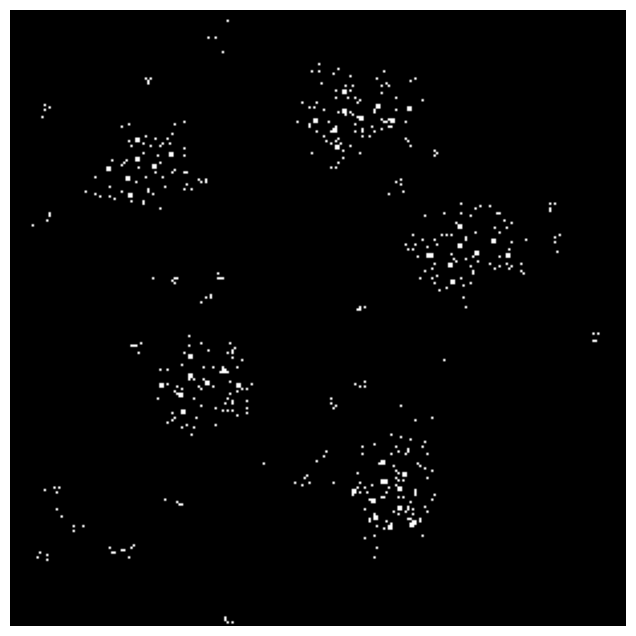

In [15]:
import matplotlib.pyplot as plt 
from PIL import Image
im = Image.new(mode="L", size=(256,256))
for x in range(256):
    for y in range(256):
        d = data[x*256+y]
        v = 0
        if d == "1":
            v = 255
        im.putpixel((x,y), v)
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.axis('image')


(-0.5, 255.5, 255.5, -0.5)

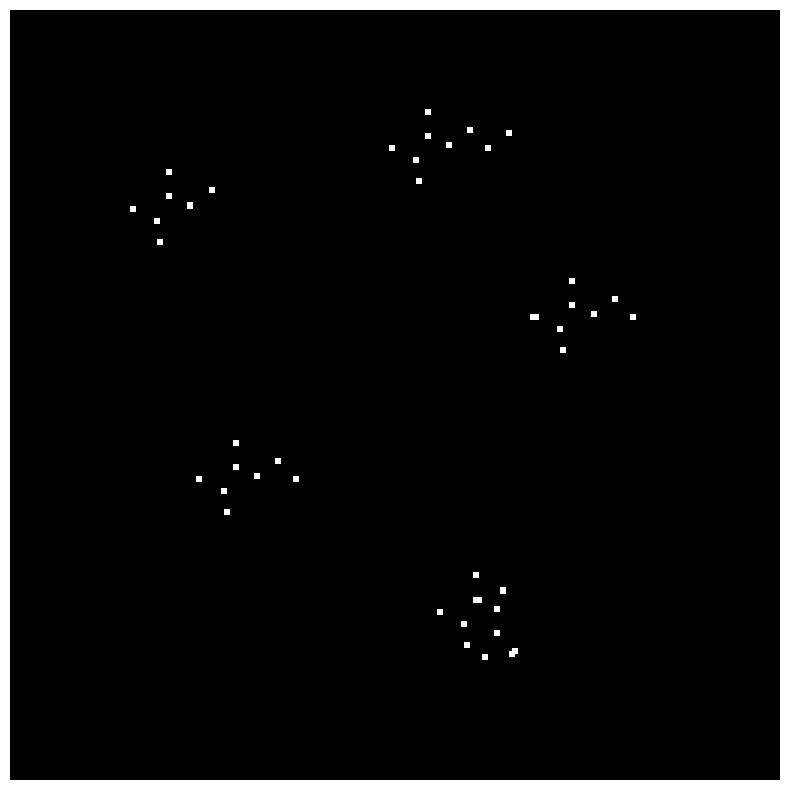

In [84]:
import matplotlib.pyplot as plt 
from PIL import Image
# filter out the squares as a separate image
im_squares = Image.new(mode="L", size=(256,256))
squares = list()
for x in range(255):
    for y in range(255):
        d1 = data[(x)*256+(y)]
        d2 = data[(x)*256+(y+1)]
        d3 = data[(x+1)*256+(y)]
        d4 = data[(x+1)*256+(y+1)]
        v = 0
        if d1 == "1" and d2 == "1" and d3 == "1" and d4 == "1":
            v = 255
            squares.append([x, y])
        if im_squares.getpixel((x,y)) == 0:
            im_squares.putpixel((x,y), v)
        if im_squares.getpixel((x+1,y)) == 0:
            im_squares.putpixel((x+1,y), v)
        if im_squares.getpixel((x,y+1)) == 0:
            im_squares.putpixel((x,y+1), v)
        if im_squares.getpixel((x+1,y+1)) == 0:
            im_squares.putpixel((x+1,y+1), v)
plt.figure(figsize=(10,10))
plt.imshow(im_squares, cmap='gray')
plt.axis('off')
plt.axis('image')


In [227]:
# find the largest repeating pattern in the coordinates of the squares
ps = [[x] for x in squares]

def compute_distances_map(ps):
    ret = []
    ret_max = []
    d = {}
    threshold = 3 # at least three copies around
    for constellations in ps:
        cons_sorted = sorted(constellations , key=lambda k: [k[1], k[0]])
        s = cons_sorted[0]
        r = []
        for p in cons_sorted:
            r.append([p[0]-s[0], p[1]-s[1]])
        key = str(r)
        if key in d:
            d[key] += 1
        else:
            d[key] = 1
    max_count = max(d.values())
    # we should threshold the counts and return only constellations that
    # have at least N=2 members
    for constellations in ps:
        cons_sorted = sorted(constellations, key=lambda k: [k[1], k[0]])
        s = cons_sorted[0]
        r = []
        for p in cons_sorted:
            r.append([p[0]-s[0], p[1]-s[1]])
        key = str(r)
        if d[key] > threshold:
            ret.append(cons_sorted)
        if d[key] == max_count:
            ret_max.append(cons_sorted)
    d2 = {}
    for dd in d:
        if d[dd] > threshold:
            d2[dd] = d[dd]
    return { 'constellations': ret, 'counts': d2, 'max_constellations': ret_max }

import itertools

# in the first iteration constellations and ps are the same
def merge_one_level(constellations, ps):
    # everyone with everyone else in a map of differences as keys
    ret = list()
    for c1 in range(len(constellations)):
        for c2 in range(len(ps)):
            # merge the two but only take unique elements
            comb = constellations[c1] + ps[c2]
            comb.sort()
            comb = list(comb for comb,_ in itertools.groupby(comb))
            if len(comb) == len(constellations[c1]) + 1:
                if comb not in ret:
                    ret.append(comb)
    return ret


In [228]:
ps2 = merge_one_level(ps,ps)
level2 = compute_distances_map(ps2)
print(len(level2['constellations']))
print(level2)

182
{'constellations': [[[40, 65], [48, 69]], [[40, 65], [49, 76]], [[52, 53], [40, 65]], [[52, 61], [40, 65]], [[59, 64], [40, 65]], [[40, 65], [62, 155]], [[66, 59], [40, 65]], [[126, 45], [40, 65]], [[40, 65], [142, 199]], [[40, 65], [174, 101]], [[48, 69], [49, 76]], [[52, 53], [48, 69]], [[52, 61], [48, 69]], [[59, 64], [48, 69]], [[66, 59], [48, 69]], [[48, 69], [70, 159]], [[134, 49], [48, 69]], [[48, 69], [150, 203]], [[48, 69], [182, 105]], [[52, 53], [49, 76]], [[52, 61], [49, 76]], [[59, 64], [49, 76]], [[66, 59], [49, 76]], [[49, 76], [71, 166]], [[135, 56], [49, 76]], [[49, 76], [151, 210]], [[49, 76], [183, 112]], [[52, 53], [52, 61]], [[52, 53], [59, 64]], [[52, 53], [66, 59]], [[52, 53], [74, 143]], [[138, 33], [52, 53]], [[52, 53], [154, 187]], [[52, 53], [186, 89]], [[52, 61], [59, 64]], [[66, 59], [52, 61]], [[52, 61], [74, 151]], [[138, 41], [52, 61]], [[52, 61], [154, 195]], [[52, 61], [186, 97]], [[66, 59], [59, 64]], [[59, 64], [81, 154]], [[145, 44], [59, 64]], 

In [229]:
ps3 = merge_one_level(level2['constellations'],ps)
level3 = compute_distances_map(ps3)
print(len(level3['constellations']))
print(level3)

226
{'constellations': [[[40, 65], [48, 69], [49, 76]], [[52, 53], [40, 65], [48, 69]], [[52, 61], [40, 65], [48, 69]], [[59, 64], [40, 65], [48, 69]], [[66, 59], [40, 65], [48, 69]], [[52, 53], [40, 65], [49, 76]], [[52, 61], [40, 65], [49, 76]], [[59, 64], [40, 65], [49, 76]], [[66, 59], [40, 65], [49, 76]], [[52, 53], [52, 61], [40, 65]], [[52, 53], [59, 64], [40, 65]], [[52, 53], [66, 59], [40, 65]], [[52, 61], [59, 64], [40, 65]], [[66, 59], [52, 61], [40, 65]], [[66, 59], [59, 64], [40, 65]], [[126, 45], [40, 65], [62, 155]], [[40, 65], [62, 155], [142, 199]], [[40, 65], [174, 101], [62, 155]], [[126, 45], [40, 65], [142, 199]], [[126, 45], [40, 65], [174, 101]], [[40, 65], [174, 101], [142, 199]], [[52, 53], [48, 69], [49, 76]], [[52, 61], [48, 69], [49, 76]], [[59, 64], [48, 69], [49, 76]], [[66, 59], [48, 69], [49, 76]], [[52, 53], [52, 61], [48, 69]], [[52, 53], [59, 64], [48, 69]], [[52, 53], [66, 59], [48, 69]], [[52, 61], [59, 64], [48, 69]], [[66, 59], [52, 61], [48, 69]]

In [230]:
ps4 = merge_one_level(level3['constellations'],ps)
level4 = compute_distances_map(ps4)
print(len(level4['constellations']))

186


In [231]:
ps5 = merge_one_level(level4['constellations'],ps)
level5 = compute_distances_map(ps5)
print(len(level5['constellations']))

96


In [232]:
ps6 = merge_one_level(level5['constellations'],ps)
level6 = compute_distances_map(ps6)
print(len(level6['constellations']))

29


In [233]:
ps7 = merge_one_level(level6['constellations'],ps)
level7 = compute_distances_map(ps7)
print(len(level7['constellations']))

4


In [276]:
ps8 = merge_one_level(level7['constellations'],ps)
level8 = compute_distances_map(ps8)
print(len(level8['constellations']))

0


In [272]:
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# create our own version of a colormap (white as second pixel, black as first)
cmap = plt.colormaps["tab20"]
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([0, 0, 0, 1])
colors[1] = np.array([1, 1, 1, 1])
my_cmap = LinearSegmentedColormap.from_list("my_cmap", colors, cmap.N)

def plot_constellations(constellations, ps):
    im = Image.new(mode="L", size=(256,256))
    # plot all points
    for pp in ps:
        for p in pp:
            p1,p2 = p
            im.putpixel((p1,p2), 1)
            im.putpixel((p1+1,p2), 1)
            im.putpixel((p1,p2+1), 1)
            im.putpixel((p1+1,p2+1), 1)
    # add the once that repeat the most
    c = 2
    for pp in constellations:
        for p in pp:
            p1,p2 = p
            im.putpixel((p1,p2), c)
            im.putpixel((p1+1,p2), c)
            im.putpixel((p1,p2+1), c)
            im.putpixel((p1+1,p2+1), c)
        c += 1

    plt.figure(figsize=(15,15))
    plt.imshow(im, cmap=my_cmap, clim=[0, 20])
    plt.axis('off')
    plt.axis('image')


Plot the largest repeated pattern of 7 large squares. There are 4 of those.

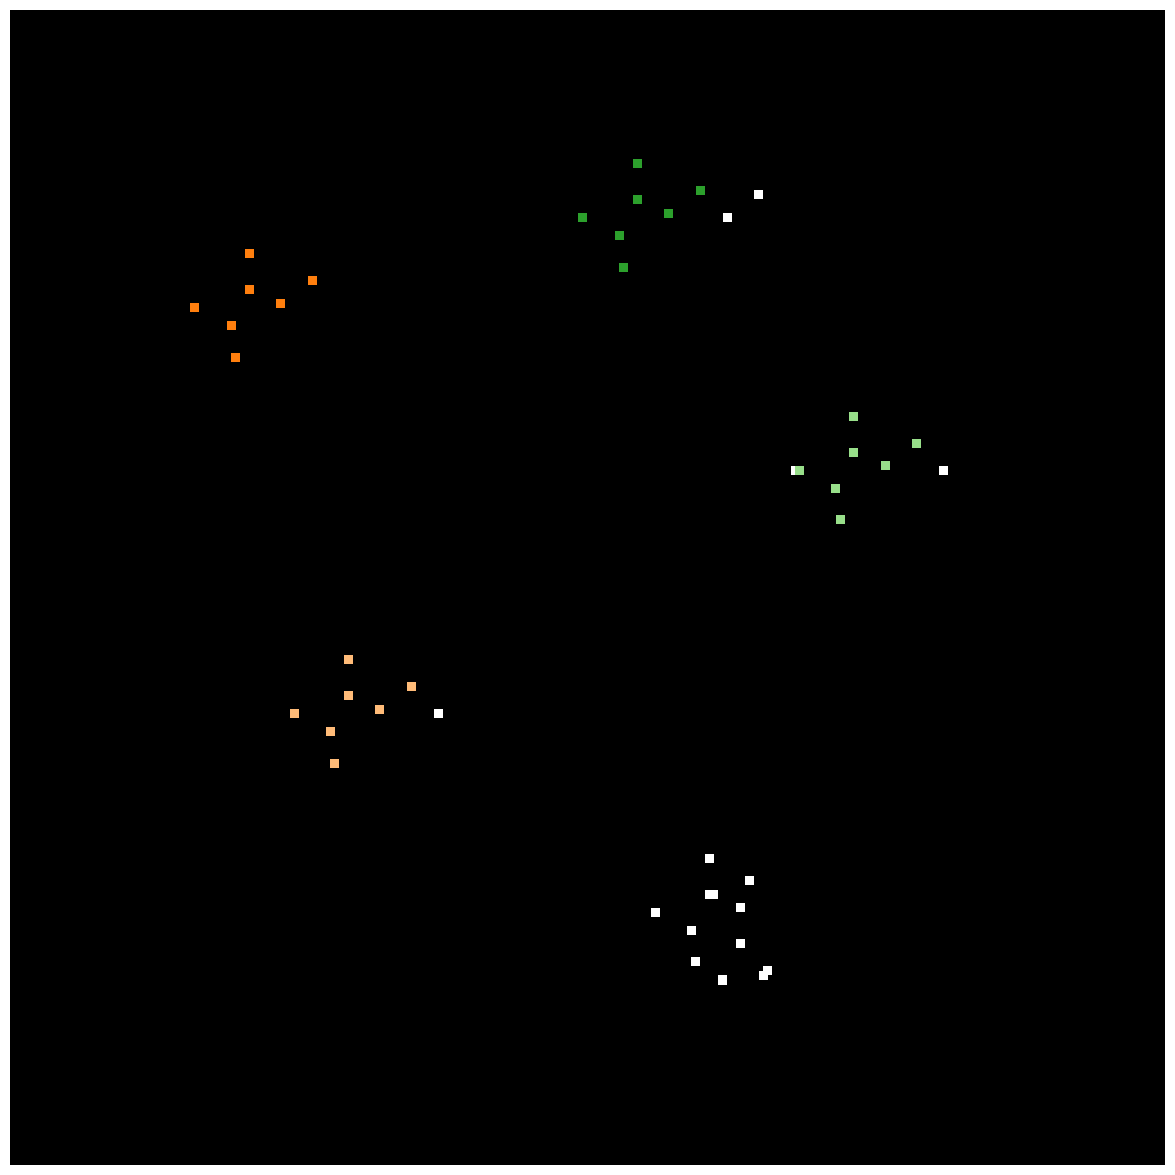

In [273]:
plot_constellations(level7['max_constellations'], ps)

Plot the largest repeating pattern of 6 squares. There are 5 of those.

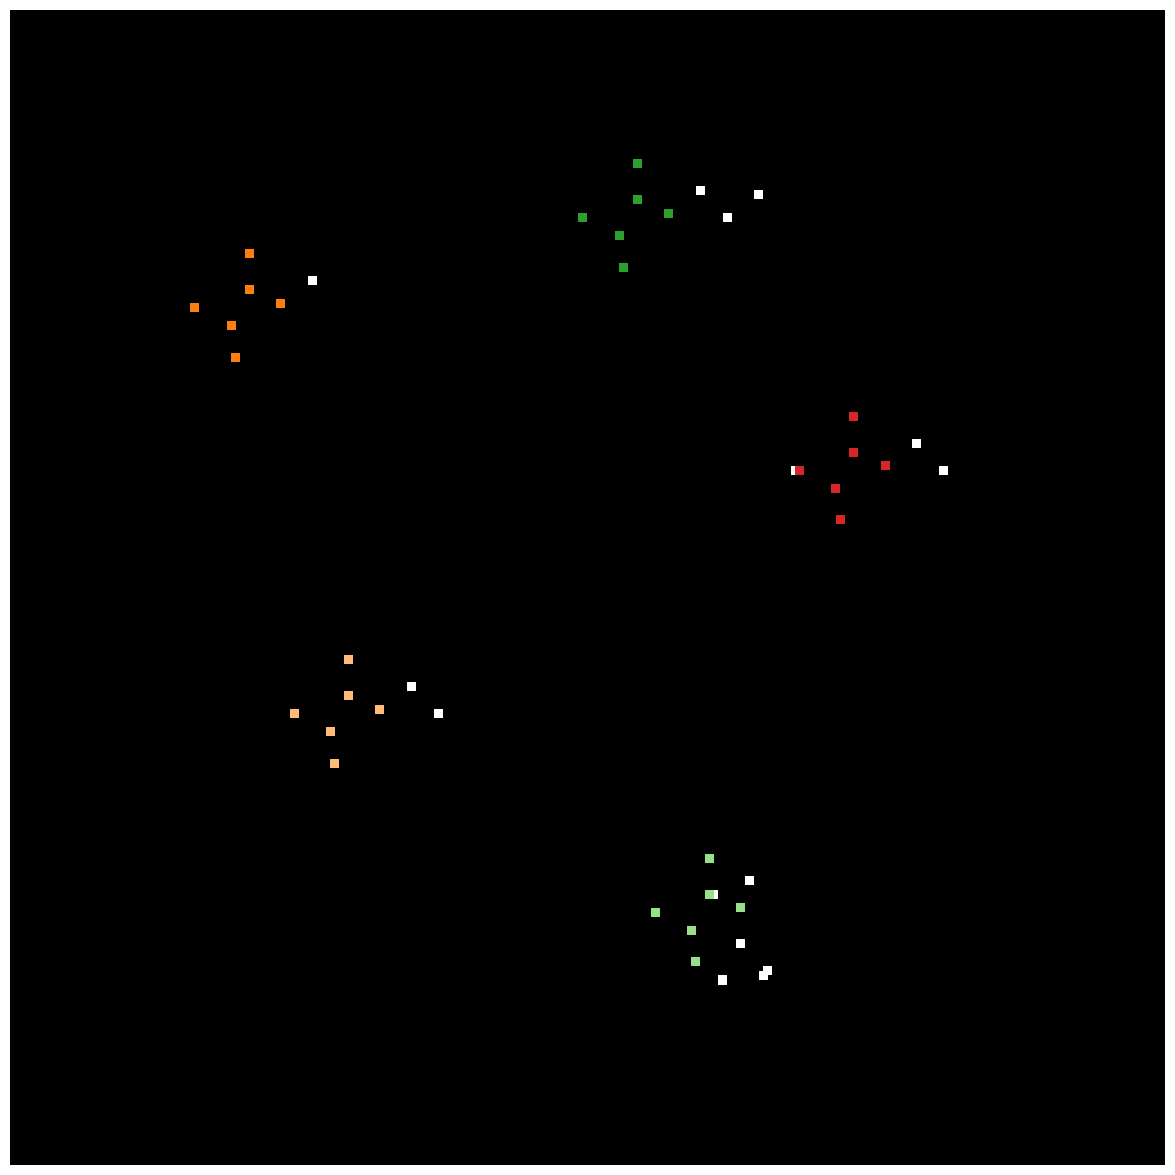

In [274]:
plot_constellations(level6['max_constellations'], ps)

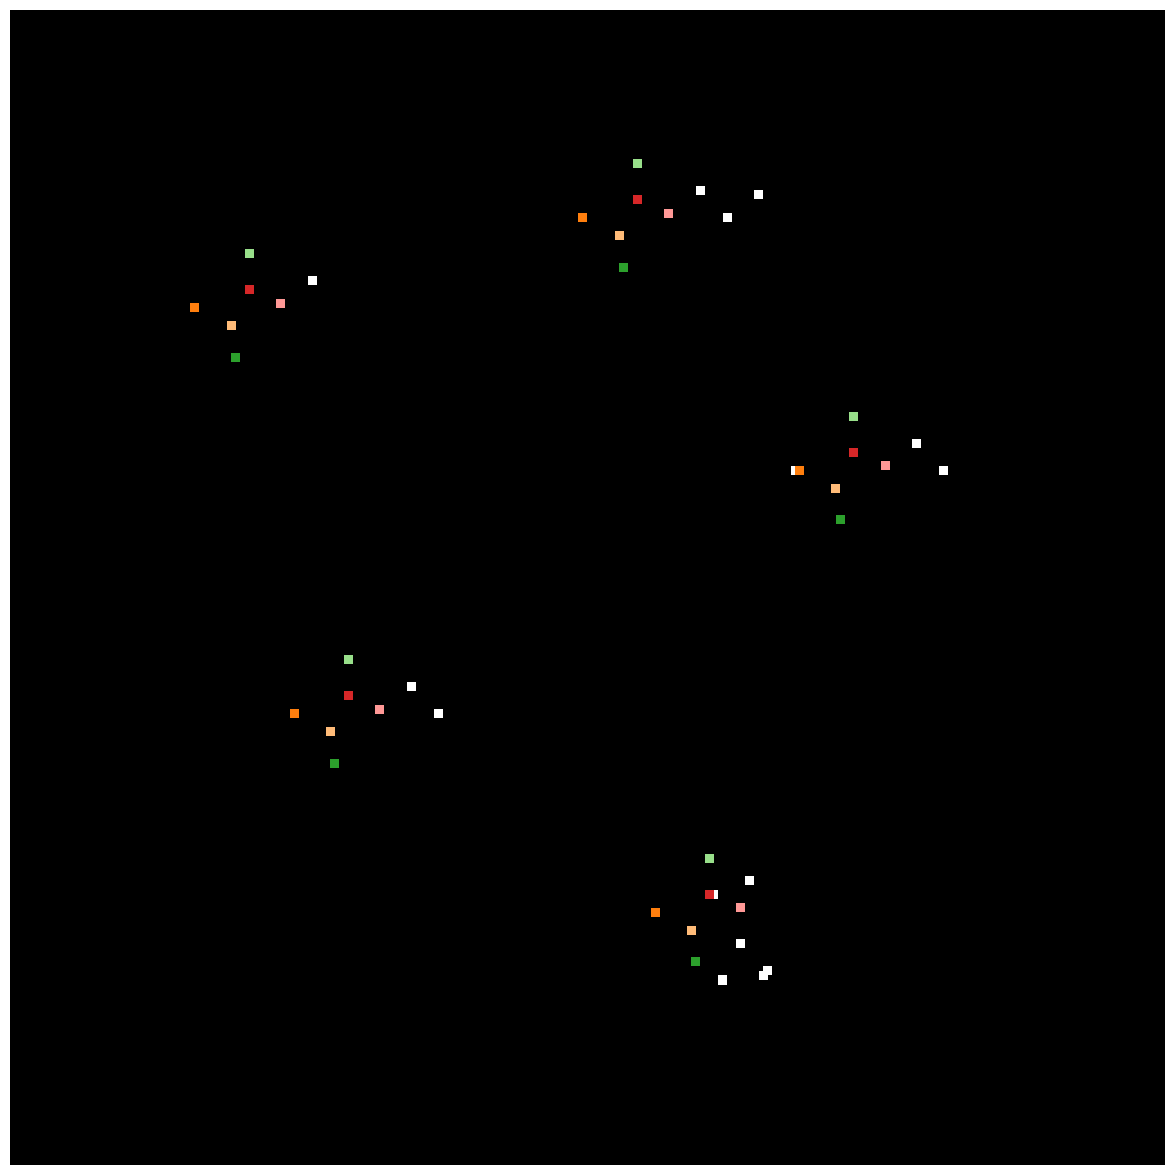

In [275]:
#plot_constellations(level5['max_constellations'], ps)